# Day 27
## Author: Sergio Esteban Tarrero
### Source: https://www.kaggle.com/datasets/residentmario/ramen-ratings

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv('ramen_ratings.csv')
df.shape

(2580, 7)

In [139]:
df.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

In [140]:
df.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


In [141]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [142]:
# drop columns Review #,Brand,Variety,Style,
df.drop(columns=['Review #', 'Brand', 'Variety', 'Style', 'Top Ten'], inplace=True)

In [143]:
df.dtypes

Country    object
Stars      object
dtype: object

In [144]:
# start to float
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

In [145]:
# mayor promedio
df.groupby('Country').mean().sort_values('Stars', ascending=False).head(10)

,Stars
Country,
Brazil,4.350000
Sarawak,4.333333
Cambodia,4.200000
Malaysia,4.154194
Singapore,4.126147
Indonesia,4.067460
Japan,3.981605
Myanmar,3.946429
Fiji,3.875000


In [146]:
# drop "ghana", "Nigeria", "Fiji", "Nepal", "United States", "Finland", "Holland"
df = df[df['Country'].isin(['Japan', 'South Korea', 'Singapore', 'Taiwan', 'Thailand', 'China', 'Malaysia', 'Hong Kong', 'Indonesia', 'Vietnam', 'Philippines', 'India', 'South Korea', 'Japan', 'Singapore', 'Taiwan', 'Thailand', 'China', 'Malaysia', 'Hong Kong', 'Indonesia', 'Vietnam', 'Philippines', 'India'])]

In [147]:
df.to_csv('ramen_ratings_cleaned.csv', index=False)

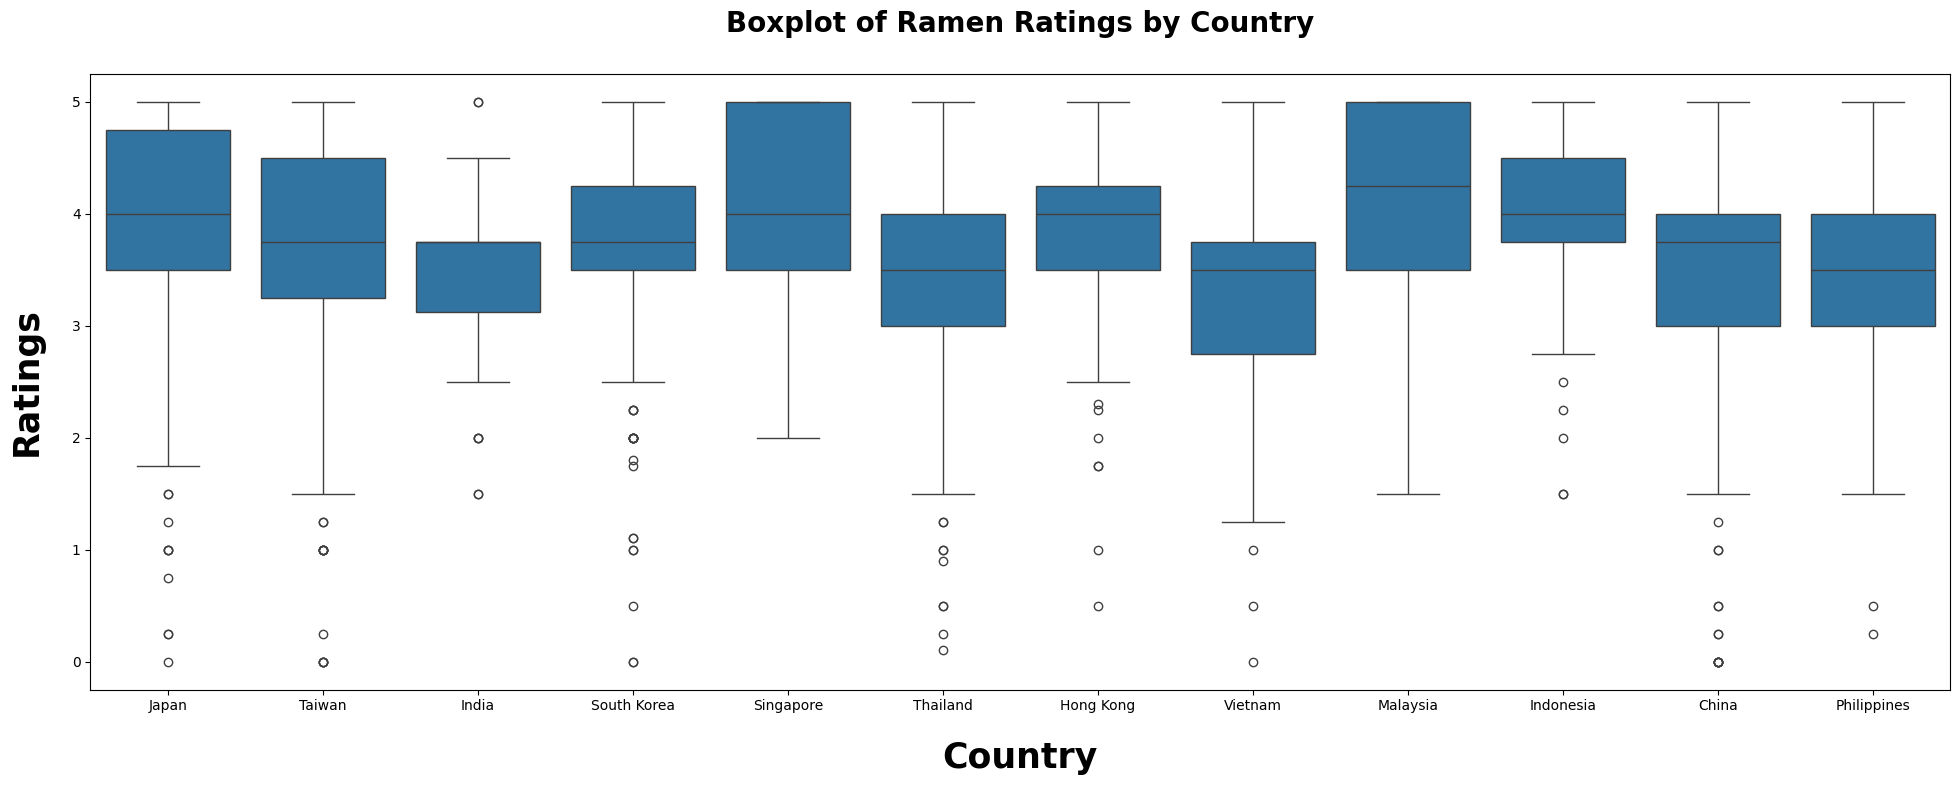

In [148]:
# Asegurarse de que la columna 'Stars' es numérica
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

# Crear el boxplot
plt.figure(figsize=(24, 8))
sns.boxplot(x='Country', y='Stars', data=df)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor visualización
plt.title('Boxplot of Ramen Ratings by Country', fontsize=20, fontweight='bold', color='Black', loc='center', pad=30)
plt.xlabel('Country', fontsize=25, fontweight='bold', color='Black', labelpad=20)
plt.ylabel('Ratings', fontsize=25, fontweight='bold', color='Black', labelpad=20)
plt.show()

In [149]:
import plotly.express as px

df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

fig = px.box(df, x='Country', y='Stars', title='Boxplot of Ramen Ratings by Country')

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Ratings',
    xaxis=dict(
        title_font=dict(size=24), 
        tickfont=dict(size=16)
    ),
    yaxis=dict(
        title_font=dict(size=16),
        tickfont=dict(size=14)
    ),
    title={
        'text': "Boxplot of Ramen Ratings by Country",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Personalizar la apariencia del gráfico
fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ),
    title_font=dict(size=25, color='Black', family="Courier New, monospace"),
)

fig.update_traces(marker=dict(size=10, opacity=0.5))

fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)


fig.add_annotation(
    x=0, y=-0.132,  # Ajusta las coordenadas según tus necesidades
    xref="paper", yref="paper",  # Referencias a las coordenadas del 'paper'
    text='Author: Sergio Esteban Tarrero<br>#30DayChartChallenge<br>Github: scullen99',
    showarrow=False,
    font=dict(size=15, color='black', family='Arial'),
    align='left'
)

fig.add_annotation(
    x=0.12, y=-0.132,  # Ajusta las coordenadas según tus necesidades
    xref="paper", yref="paper",
    text='Day 27<br>Source: Ramen Ratings (Kaggle Dataset)',
    showarrow=False,
    font=dict(size=15, color='black', family='Arial'),
    align='left'
)

fig.update_layout(
    margin=dict(b=100)  # Aumenta el margen inferior para asegurar que el texto sea visible
)


fig.write_html('SergioEstebanTarreroDay27.html')

fig.show()